In [18]:
from IPython.core.display import display, HTML
from warnings import filterwarnings
display(HTML("<style>.container { width:100% !important; }</style>"))
filterwarnings(action='ignore')

In [19]:
# evalys requires pandas==0.25.3
# %matplotlib inline
from pandas import read_csv
import matplotlib
# import matplotlib.pyplot as plt
from evalys.jobset import JobSet

In [20]:
schedule = read_csv("../output/out_schedule.csv")
schedule.T

,0
batsim_version,3.1.0
consumed_joules,0
makespan,19163.4
max_slowdown,22.2958
max_turnaround_time,11571.4
max_waiting_time,9571.39
mean_slowdown,3.54673
mean_turnaround_time,1642.67
mean_waiting_time,1195.88
nb_computing_machines,37


In [21]:
js = JobSet.from_csv("../output/out_jobs.csv")
js.df

,jobID,workload_name,profile,submission_time,requested_number_of_resources,requested_time,success,final_state,starting_time,execution_time,finish_time,waiting_time,turnaround_time,stretch,allocated_resources,consumed_energy,metadata,proc_alloc
0,0,w0,0,83.0,1,2000.0,1,COMPLETED_SUCCESSFULLY,83.000000,9.715724,92.715724,0.000000,9.715724,1.00000,[0],-1.0,NaN,1
1,1,w0,1,288.0,1,2000.0,1,COMPLETED_SUCCESSFULLY,288.000000,11.952171,299.952171,0.000000,11.952171,1.00000,[0],-1.0,NaN,1
2,10,w0,10,944.0,4,2000.0,1,COMPLETED_SUCCESSFULLY,944.000000,358.479986,1302.479986,0.000000,358.479986,1.00000,"[7, 8, 9, 10]",-1.0,NaN,4
3,11,w0,11,979.0,2,2000.0,1,COMPLETED_SUCCESSFULLY,979.000000,148.396037,1127.396037,0.000000,148.396037,1.00000,"[11, 12]",-1.0,NaN,2
4,12,w0,12,1109.0,9,2000.0,1,COMPLETED_SUCCESSFULLY,1109.000000,1402.880454,2511.880454,0.000000,1402.880454,1.00000,"[13, 14, 15, 16, 17, 18, 19, 20, 21]",-1.0,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,w0,95,8356.0,1,2000.0,1,COMPLETED_SUCCESSFULLY,8356.000000,9.293843,8365.293843,0.000000,9.293843,1.00000,[28],-1.0,NaN,1
96,96,w0,96,8388.0,1,2000.0,1,COMPLETED_SUCCESSFULLY,8388.000000,11.194974,8399.194974,0.000000,11.194974,1.00000,[28],-1.0,NaN,1
97,97,w0,97,8408.0,2,2000.0,1,COMPLETED_SUCCESSFULLY,8408.000000,145.010796,8553.010796,0.000000,145.010796,1.00000,"[28, 29]",-1.0,NaN,2
98,98,w0,98,8579.0,4,2000.0,1,COMPLETED_SUCCESSFULLY,11640.422583,398.532460,12038.955044,3061.422583,3459.955044,8.68174,"[25, 26, 27, 28]",-1.0,NaN,4


In [22]:
js.df.describe()

,submission_time,requested_number_of_resources,requested_time,success,starting_time,execution_time,finish_time,waiting_time,turnaround_time,stretch,consumed_energy,metadata,proc_alloc
count,100.000000,100.000000,100.0,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,0.0,100.000000
mean,4449.290000,4.110000,2000.0,0.92000,5645.171413,446.786395,6091.957808,1195.881413,1642.667808,3.546734,-1.0,NaN,4.110000
std,2531.181093,4.896701,0.0,0.27266,3936.409305,606.951305,4223.027794,2111.289566,2574.809136,3.952206,0.0,NaN,4.896701
min,83.000000,1.000000,2000.0,0.00000,83.000000,7.316462,92.715724,0.000000,8.821401,1.000000,-1.0,NaN,1.000000
25%,2313.500000,1.000000,2000.0,1.00000,2642.340164,11.636150,2937.932135,0.000000,32.358596,1.000000,-1.0,NaN,1.000000
50%,4422.000000,3.000000,2000.0,1.00000,5474.030341,240.731831,5731.152344,138.012472,406.149793,1.834094,-1.0,NaN,3.000000
75%,6752.000000,4.250000,2000.0,1.00000,8005.702693,432.425716,8437.648930,1359.543749,2077.140718,4.852970,-1.0,NaN,4.250000
max,8588.000000,25.000000,2000.0,1.00000,17163.387130,2000.000000,19163.387130,9571.387130,11571.387130,22.295795,-1.0,NaN,25.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126b28c70>,
      dtype=object)

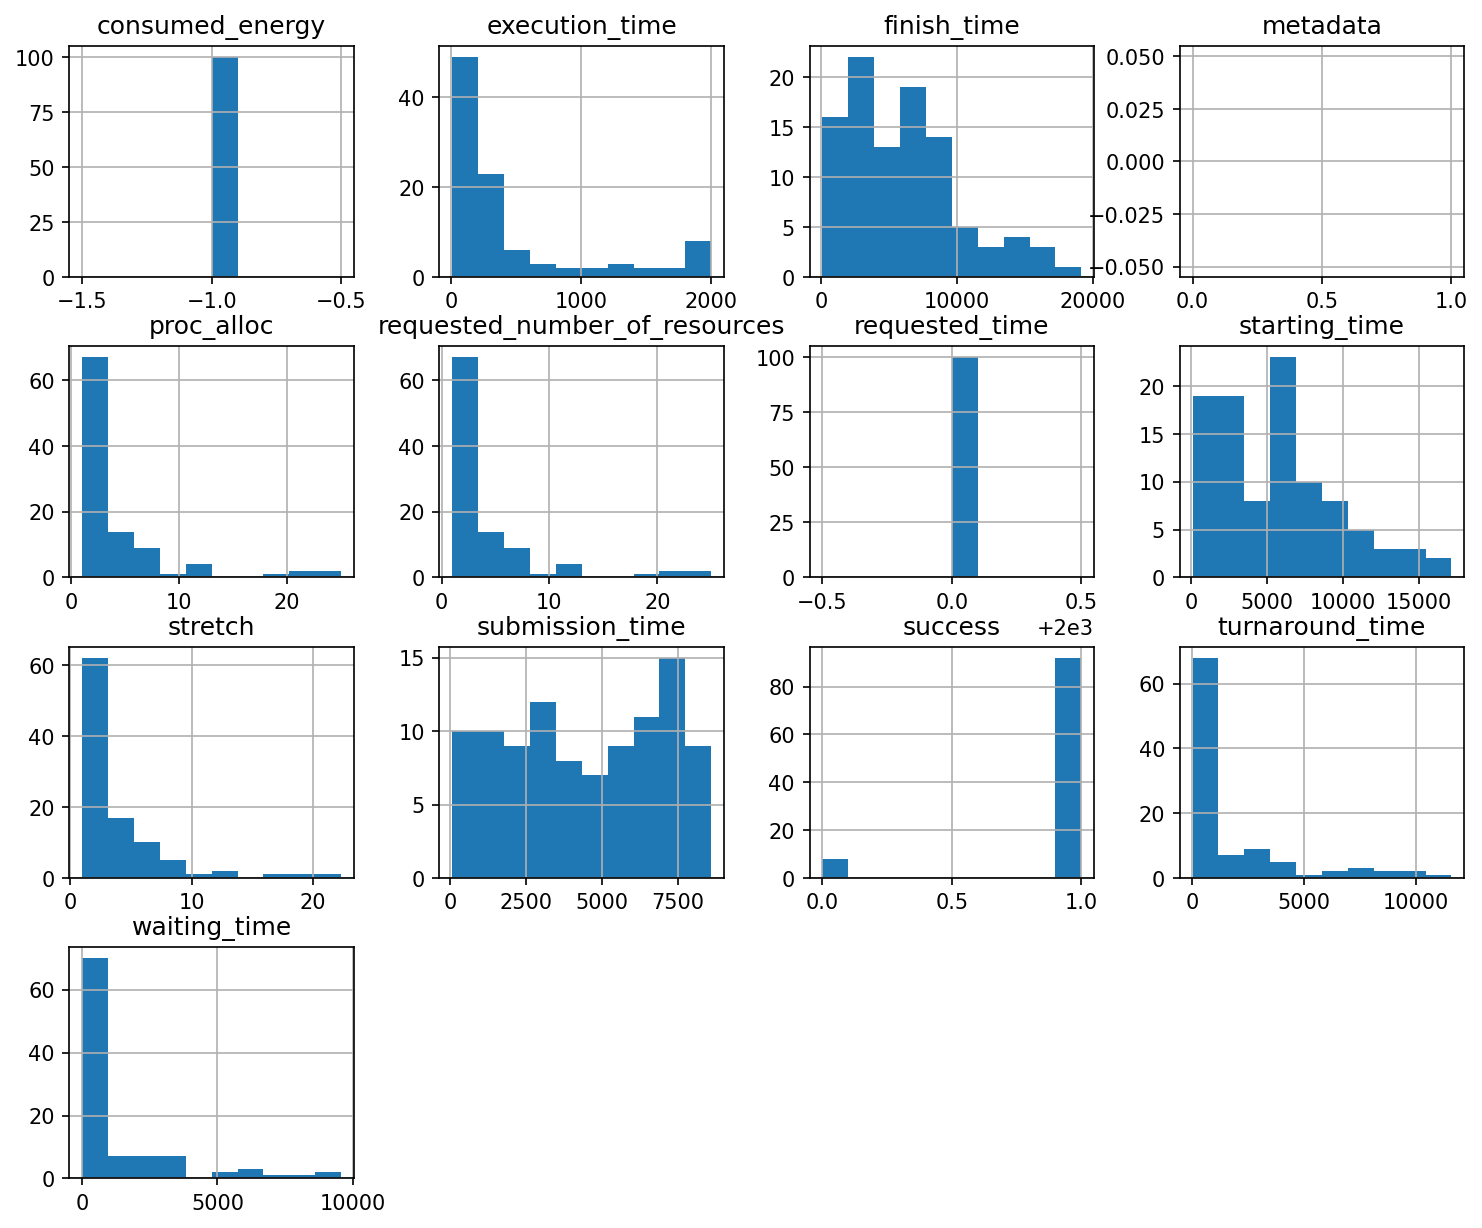

In [23]:
js.df.hist()

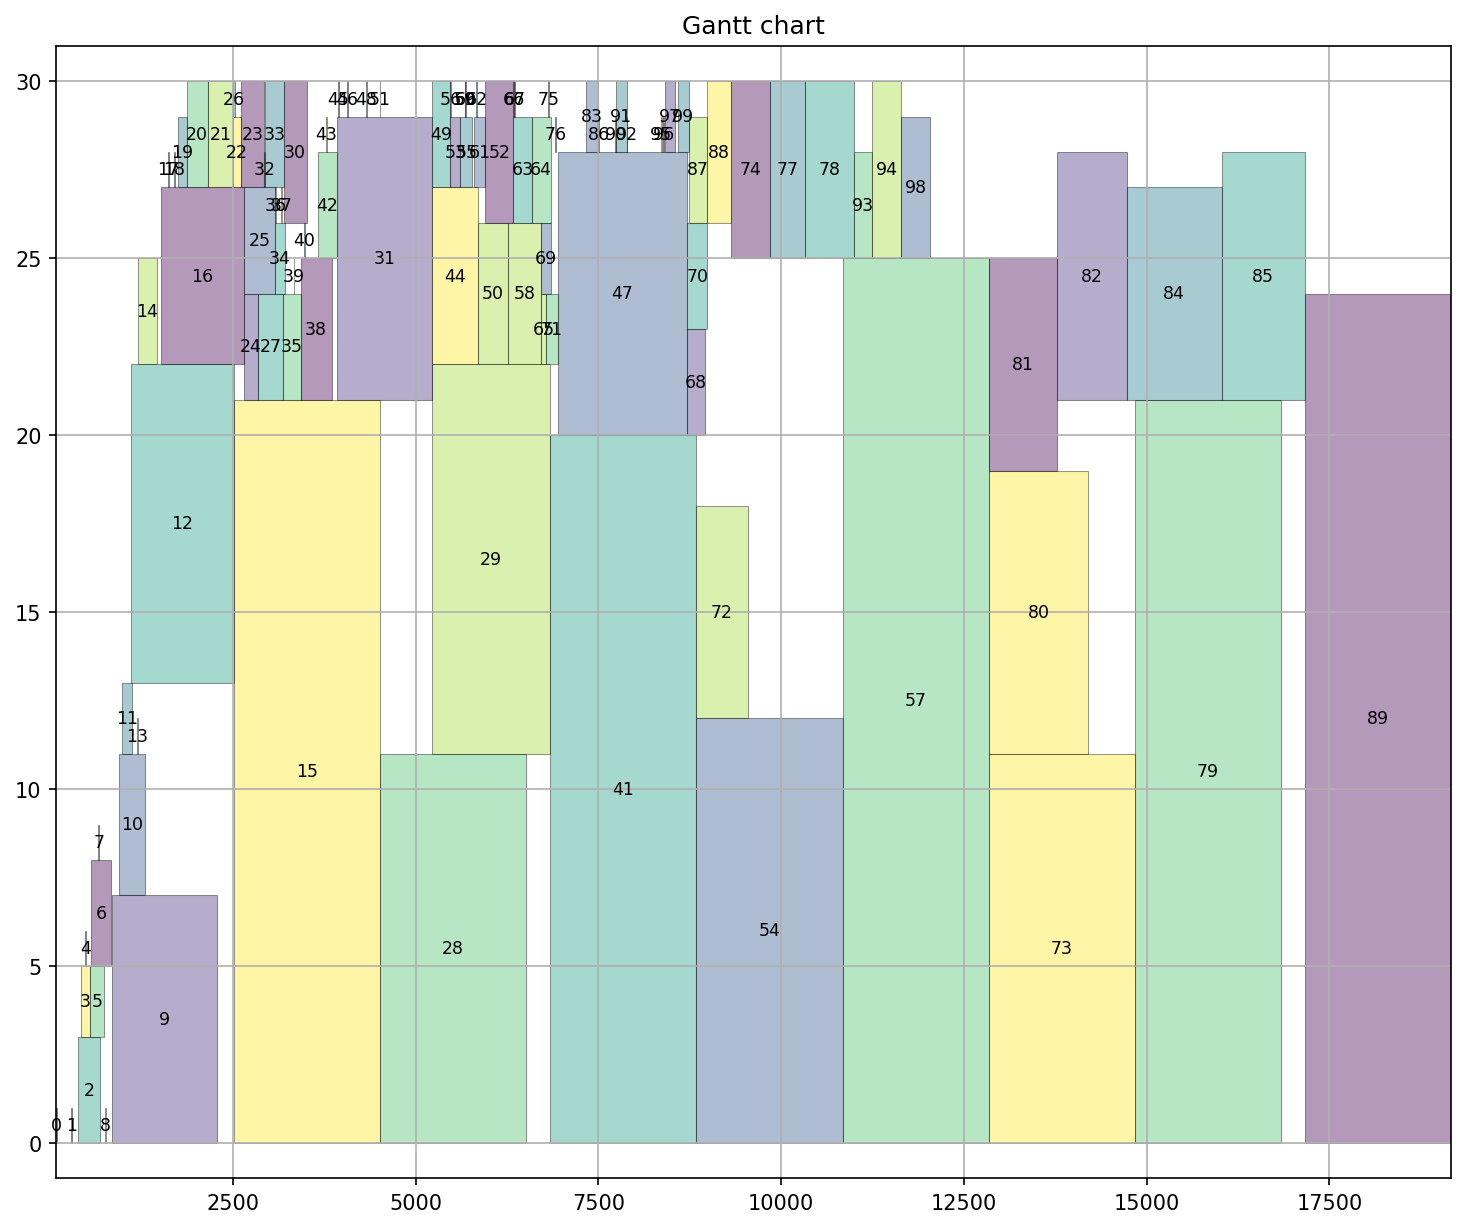

In [24]:
js.gantt()

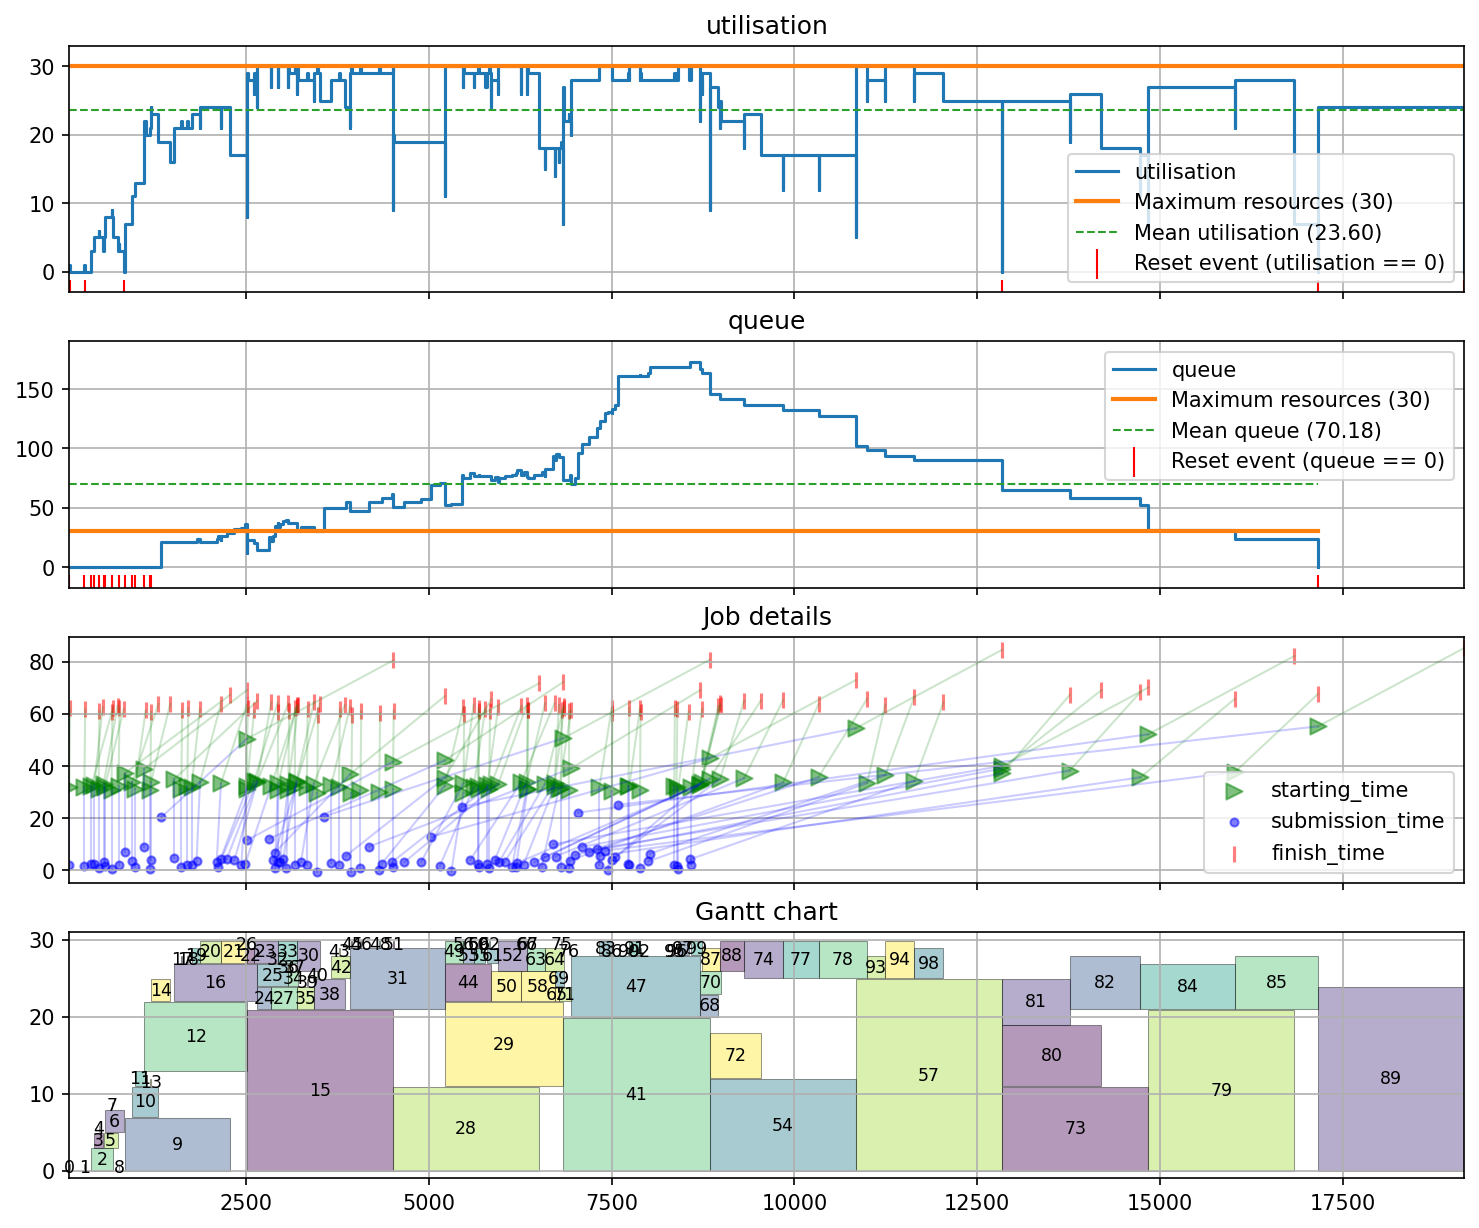

In [25]:
matplotlib.rcParams['figure.figsize'] = 12, 10
matplotlib.rcParams['figure.dpi']= 150
js.plot(with_details=True)